Libraries

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Reading Data

In [123]:
df1 = pd.read_csv("../data/heart.csv")
df2 = pd.read_csv("../data/o2Saturation.csv",names=["o2Saturation"])
df = df1.merge(df2, left_index=True, right_index=True)

In [124]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.6
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,98.1


In [125]:
df.shape

(303, 15)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    int64  
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  output        303 non-null    int64  
 14  o2Saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


/tmp/ipykernel_206932/3642445980.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


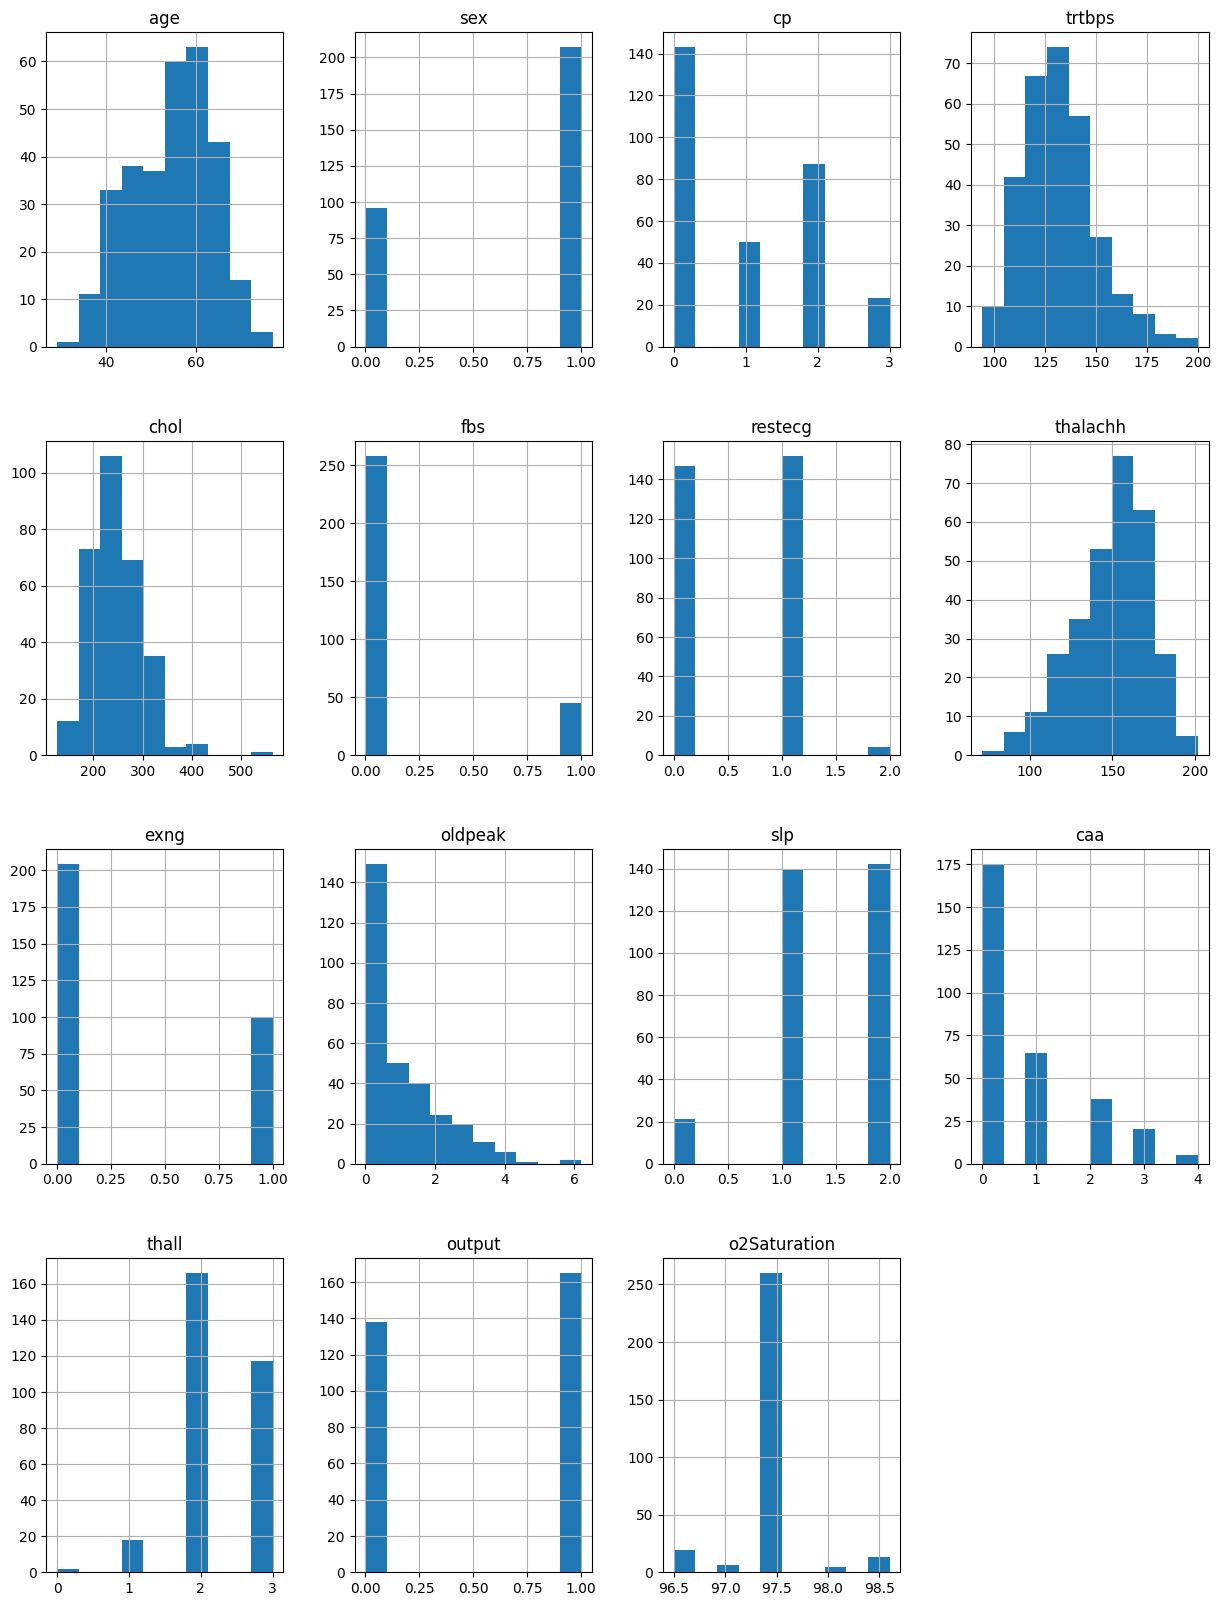

In [127]:
fig =  plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()


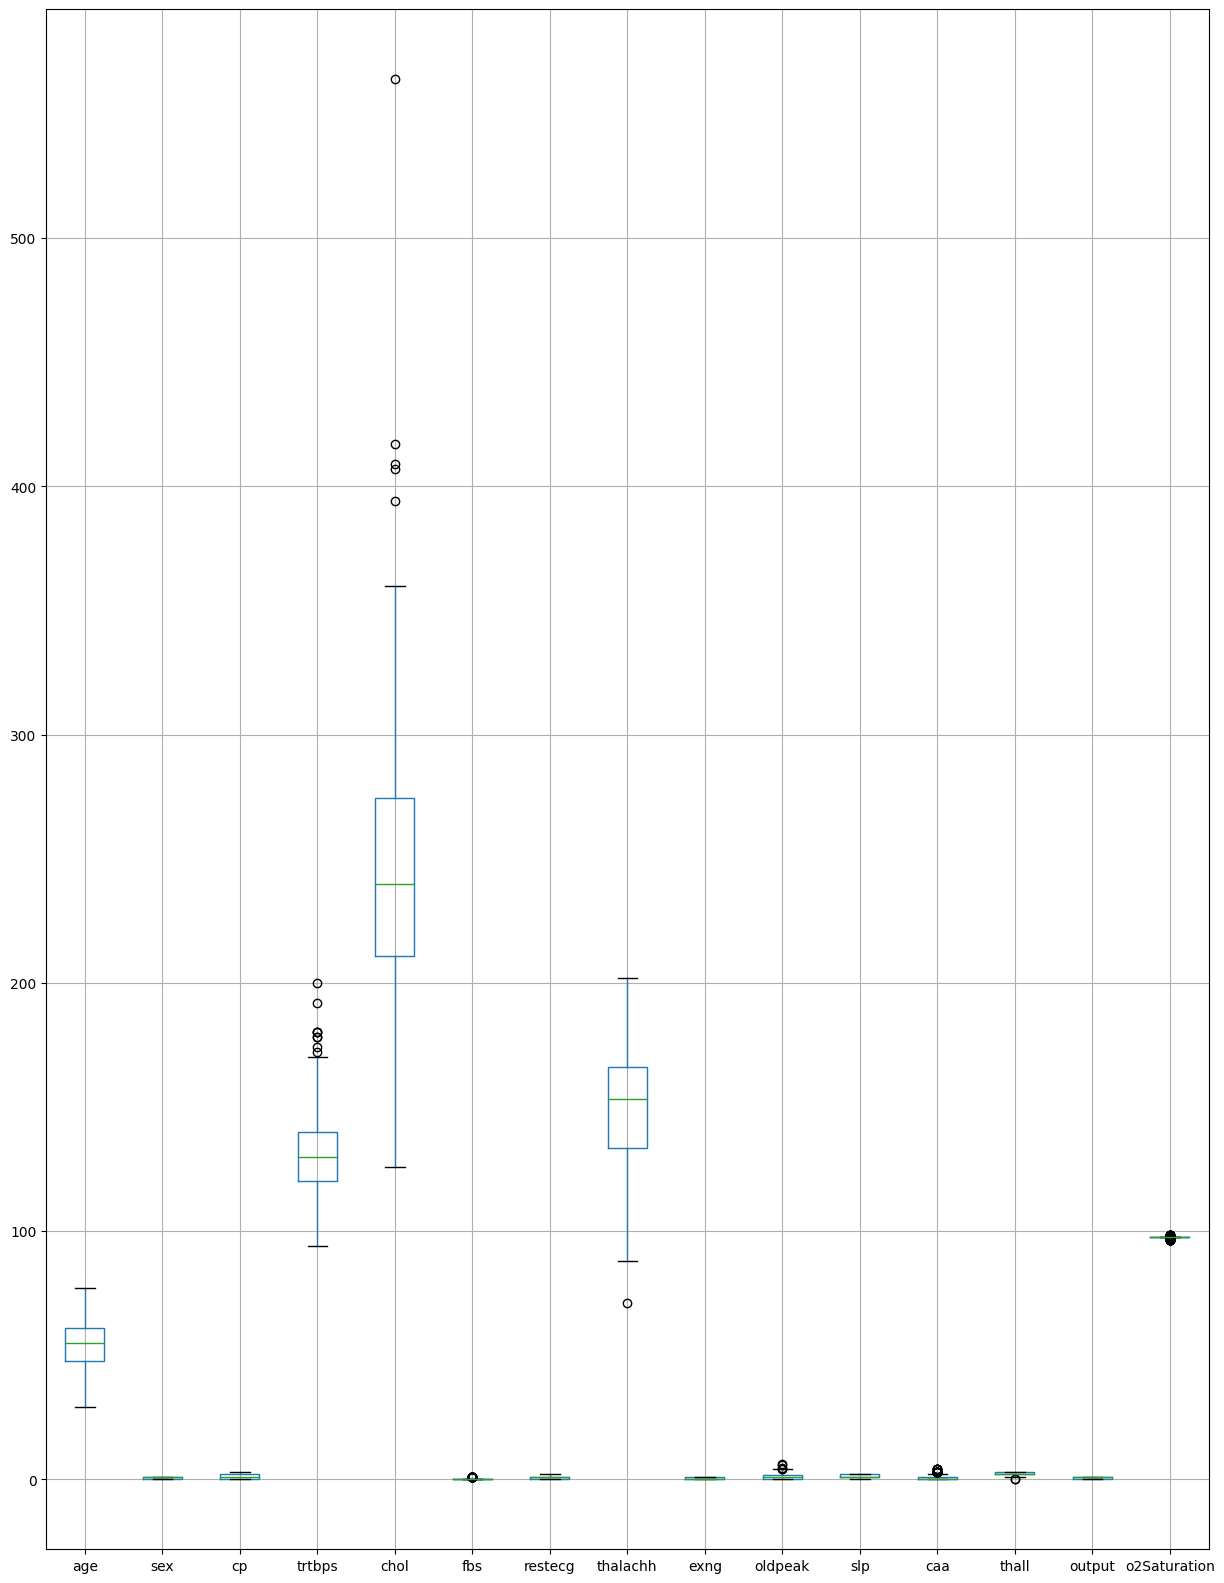

In [128]:
# boxplot each feature
fig =  plt.figure(figsize = (15,20))
ax = fig.gca()
df.boxplot(ax=ax)
plt.show()


In [129]:
# handle outliers

def handle_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[col] > upper_bound, col] = upper_bound
    df.loc[df[col] < lower_bound, col] = lower_bound
    return df

df = handle_outliers(df, 'trtbps')
df = handle_outliers(df, 'chol')
# df = handle_outliers(df, 'thalachh')
# df = handle_outliers(df, 'oldpeak')

# using handle_outliers function yields 88% accuracy





In [130]:
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.280528,245.134488,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.484488
std,9.082101,0.466011,1.032052,16.582241,47.552910,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.352649
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,170.000000,369.750000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [131]:
abs(df.corr()["output"]).sort_values(ascending=False)

output          1.000000
exng            0.436757
cp              0.433798
oldpeak         0.430696
thalachh        0.421741
caa             0.391724
slp             0.345877
thall           0.344029
o2Saturation    0.313584
sex             0.280937
age             0.225439
trtbps          0.138621
restecg         0.137230
chol            0.103987
fbs             0.028046
Name: output, dtype: float64

In [132]:
df.isnull().sum().any()

False

In [133]:
# perform lasso regression to find the most important features
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = df.drop("output", axis=1)
y = df["output"]

# apply the lasso regression
lasso = Lasso(alpha=0.005, random_state=0)
lasso.fit(X, y)

# check the coefficients
lasso.coef_

# check the selected features
selected_features = X.columns[(lasso.coef_ != 0)]
selected_features


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'o2Saturation'],
      dtype='object')

In [134]:
X = df[selected_features]
y = df["output"]

# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)

# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [135]:
X.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2Saturation
0,63,1,3,145,233.0,0,150,0,2.3,0,0,1,98.6
1,37,1,2,130,250.0,1,187,0,3.5,0,0,2,98.6
2,41,0,1,130,204.0,0,172,0,1.4,2,0,2,98.6
3,56,1,1,120,236.0,1,178,0,0.8,2,0,2,98.6
4,57,0,0,120,354.0,1,163,1,0.6,2,0,2,98.1


In [136]:
# Creating Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [137]:
# KNN

# perform grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# use the best parameters
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report: \n", classification_report(y_test, y_pred_knn))


KNN Accuracy:  0.9016393442622951
KNN Confusion Matrix: 
 [[27  2]
 [ 4 28]]
KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [138]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report: \n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.9016393442622951
Logistic Regression Confusion Matrix: 
 [[28  1]
 [ 5 27]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [139]:
# Decision Tree

# perform grid search to find the best parameters


dt = DecisionTreeClassifier()

param_grid = {'max_depth': np.arange(1, 25)}
dt_gscv = GridSearchCV(dt, param_grid, cv=5)
dt_gscv.fit(X_train, y_train)

# use the best parameters
dt = DecisionTreeClassifier(max_depth=dt_gscv.best_params_['max_depth'])

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report: \n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy:  0.8524590163934426
Decision Tree Confusion Matrix: 
 [[26  3]
 [ 6 26]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [140]:
# Random Forest

# perform grid search to find the best parameters
rf = RandomForestClassifier()

param_grid = {'n_estimators': np.arange(1, 25)}
rf_gscv = GridSearchCV(rf, param_grid, cv=5)
rf_gscv.fit(X_train, y_train)

# use the best parameters
rf = RandomForestClassifier(n_estimators=rf_gscv.best_params_['n_estimators'])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report: \n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy:  0.819672131147541
Random Forest Confusion Matrix: 
 [[27  2]
 [ 9 23]]
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [141]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report: \n", classification_report(y_test, y_pred_svm))


SVM Accuracy:  0.9180327868852459
SVM Confusion Matrix: 
 [[27  2]
 [ 3 29]]
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [142]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix: \n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report: \n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy:  0.8852459016393442
Naive Bayes Confusion Matrix: 
 [[26  3]
 [ 4 28]]
Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [143]:
# XGBoost

# perform grid search to find the best parameters

xgb = XGBClassifier()

param_grid = {'max_depth': np.arange(1, 25)}
xgb_gscv = GridSearchCV(xgb, param_grid, cv=5)
xgb_gscv.fit(X_train, y_train)

# use the best parameters
xgb = XGBClassifier(max_depth=xgb_gscv.best_params_['max_depth'])
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report: \n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy:  0.9344262295081968
XGBoost Confusion Matrix: 
 [[29  0]
 [ 4 28]]
XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        29
           1       1.00      0.88      0.93        32

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [144]:
# create a voting classifier
vc = VotingClassifier(estimators=[("KNN", knn), ("Logistic Regression", lr), ("Decision Tree", dt), ("Random Forest", rf), ("SVM", svm), ("Naive Bayes", nb), ("XGBoost", xgb)], voting="hard")
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
print("Voting Classifier Accuracy: ", accuracy_score(y_test, y_pred_vc))
print("Voting Classifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_vc))
print("Voting Classifier Classification Report: \n", classification_report(y_test, y_pred_vc))

Voting Classifier Accuracy:  0.9180327868852459
Voting Classifier Confusion Matrix: 
 [[27  2]
 [ 3 29]]
Voting Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [145]:

# create a dataframe to compare the models
models = pd.DataFrame({
    "Model": ["KNN", "Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Naive Bayes", "XGBoost", "Voting Classifier"],
    "Accuracy": [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_vc)]
})

models

,Model,Accuracy
0,KNN,0.901639
1,Logistic Regression,0.901639
2,Decision Tree,0.852459
3,Random Forest,0.819672
4,SVM,0.918033
5,Naive Bayes,0.885246
6,XGBoost,0.934426
7,Voting Classifier,0.918033


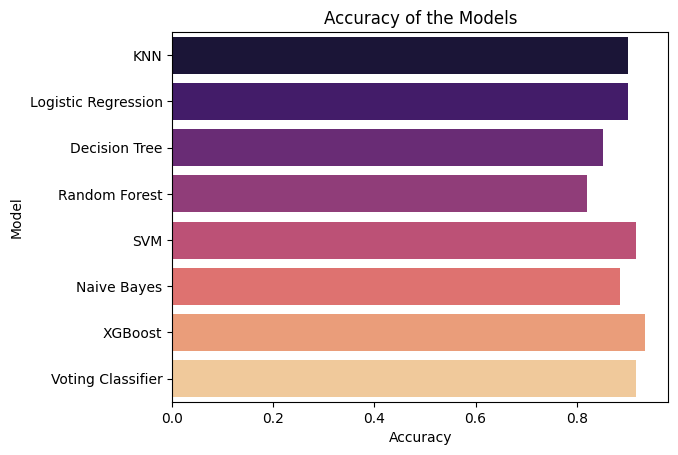

In [146]:

# plot the accuracy of the models
sns.barplot(x="Accuracy", y="Model", data=models, palette="magma")
plt.title("Accuracy of the Models")
plt.show()


In [147]:
# find who are most likely to have heart disease
df["output"].value_counts()

# 1 = heart disease
# 0 = no heart disease

# create a dataframe with only the people who have heart disease
df_hd = df[df["output"] == 1]
df_hd.head()

# Conclusion

# 1. people with chest pain type 2
# 2. people with thalassemia type 2
# 3. people with slope type 2
# 4. people with ca type 0
# 5. people with thalachh > 150
# 6. people with oldpeak < 1
# 7. people with cp type 0
# 8. people with exng type 0
# 9. people with age > 50
# 10. people with chol < 250
# 11. people with thal type 2




,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1,98.6
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1,98.1


In [148]:
# save the model
import pickle
pickle.dump(vc, open("heart_disease.pkl", "wb"))

# save the scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))



In [149]:
# load the model
model = pickle.load(open("heart_disease.pkl", "rb"))
